In [1]:
import pandas as pd
import nltk
nltk.download("punkt","stopwords")
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to stopwords...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df=pd.read_csv("bbc_news_data.csv")

In [3]:
df

,Unnamed: 0,URL,Title,Paragraph
0,0,https://www.bbc.com/news/business-67873127,The festivals searching for greener ways to rock,Hannah Love is a lifelong festival goer. She c...
1,1,https://www.bbc.com/news/business-68017347,The staff shortage in India's special effects ...,"As a child, Vinay Sastha R found his imaginati..."
2,2,https://www.bbc.com/news/business-68138944,The brewing secrets behind tastier no-alcohol ...,Joe Thomson stands surveying his shiny brewery...
3,3,https://www.bbc.com/news/business-68346015,How AI is helping the search for extraterrestr...,There are between 10 and 50 billion potentiall...
4,4,https://www.bbc.com/news/entertainment-arts-68...,London Fashion Week in pictures: Naomi Campbel...,Original supermodel Naomi Campbell capped off ...
5,5,https://www.bbc.com/news/entertainment-arts-68...,Dan Wootton: Metropolitan Police taking no fur...,Police in London have said they will take no f...
6,6,https://www.bbc.com/news/entertainment-arts-68...,Stray Kids: How K-Pop took over the global cha...,"Inevitably enough, Taylor Swift was the bigges..."
7,7,https://www.bbc.com/news/in-pictures-68336119,Underwater Photographer of the Year 2024 winners,Alex Dawson has been named Underwater Photogra...
8,8,https://www.bbc.com/news/technology-68312395,Xbox games coming to Nintendo Switch and PS5 n...,Four games that were formerly exclusive to Mic...
9,9,https://www.bbc.com/news/world-68261148,In pictures: Welcoming the Lunar New Year,Saturday 10 February marked the start of Lunar...


In [4]:
# remove punctuation

df["Paragraph"]

0     Hannah Love is a lifelong festival goer. She c...
1     As a child, Vinay Sastha R found his imaginati...
2     Joe Thomson stands surveying his shiny brewery...
3     There are between 10 and 50 billion potentiall...
4     Original supermodel Naomi Campbell capped off ...
5     Police in London have said they will take no f...
6     Inevitably enough, Taylor Swift was the bigges...
7     Alex Dawson has been named Underwater Photogra...
8     Four games that were formerly exclusive to Mic...
9     Saturday 10 February marked the start of Lunar...
10    A selection of the best photos from the Africa...
11    Dozens of archaeological sites in Afghanistan ...
12    Surgeries have been delayed and hospitals have...
13    Of the nine bowlers who have claimed 500 Test ...
14    Some of India's top airlines have been ordered...
15    A protester has died as farmers attempted to r...
16    India's president has made a whistle stop tour...
17    Australian bishop Christopher Saunders has

In [5]:
# replace the punctuation to space

df["processed_paragraph"]=df["Paragraph"].str.replace("[^a-zA-Z0-9]"," ")

C:\Users\santh\AppData\Local\Temp\ipykernel_20440\193870040.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["processed_paragraph"]=df["Paragraph"].str.replace("[^a-zA-Z0-9]"," ")


In [6]:
df["processed_paragraph"]

0     Hannah Love is a lifelong festival goer  She c...
1     As a child  Vinay Sastha R found his imaginati...
2     Joe Thomson stands surveying his shiny brewery...
3     There are between 10 and 50 billion potentiall...
4     Original supermodel Naomi Campbell capped off ...
5     Police in London have said they will take no f...
6     Inevitably enough  Taylor Swift was the bigges...
7     Alex Dawson has been named Underwater Photogra...
8     Four games that were formerly exclusive to Mic...
9     Saturday 10 February marked the start of Lunar...
10    A selection of the best photos from the Africa...
11    Dozens of archaeological sites in Afghanistan ...
12    Surgeries have been delayed and hospitals have...
13    Of the nine bowlers who have claimed 500 Test ...
14    Some of India s top airlines have been ordered...
15    A protester has died as farmers attempted to r...
16    India s president has made a whistle stop tour...
17    Australian bishop Christopher Saunders has

In [7]:
df["processed_paragraph"]=[row.lower() for row in df["processed_paragraph"]]

In [8]:
df["processed_paragraph"]

0     hannah love is a lifelong festival goer  she c...
1     as a child  vinay sastha r found his imaginati...
2     joe thomson stands surveying his shiny brewery...
3     there are between 10 and 50 billion potentiall...
4     original supermodel naomi campbell capped off ...
5     police in london have said they will take no f...
6     inevitably enough  taylor swift was the bigges...
7     alex dawson has been named underwater photogra...
8     four games that were formerly exclusive to mic...
9     saturday 10 february marked the start of lunar...
10    a selection of the best photos from the africa...
11    dozens of archaeological sites in afghanistan ...
12    surgeries have been delayed and hospitals have...
13    of the nine bowlers who have claimed 500 test ...
14    some of india s top airlines have been ordered...
15    a protester has died as farmers attempted to r...
16    india s president has made a whistle stop tour...
17    australian bishop christopher saunders has

In [9]:
df["processed_paragraph"]=df["processed_paragraph"].apply(lambda x:" ".join([word for word in x.split() if len(word)>2]))

In [10]:
stop_word=stopwords.words("english")


def remove_stopword(text):
    paragraph_tokenized=word_tokenize(text)
    rev_new=" ".join([i for i in paragraph_tokenized if i not in stop_word])
    return rev_new

In [11]:
df["processed_paragraph"]=df["processed_paragraph"].apply(remove_stopword)

In [12]:
df["processed_paragraph"]

0     hannah love lifelong festival goer counts firs...
1     child vinay sastha found imagination fired fil...
2     joe thomson stands surveying shiny brewery ele...
3     billion potentially habitable worlds galaxy sa...
4     original supermodel naomi campbell capped whir...
5     police london said take action news presenter ...
6     inevitably enough taylor swift biggest selling...
7     alex dawson named underwater photographer year...
8     four games formerly exclusive microsoft soon a...
9     saturday february marked start lunar new year ...
10    selection best photos african continent beyond...
11    dozens archaeological sites afghanistan bulldo...
12    surgeries delayed hospitals turned away patien...
13    nine bowlers claimed 500 test wickets india ra...
14    india top airlines ordered start sending passe...
15    protester died farmers attempted resume march ...
16    india president made whistle stop tour island ...
17    australian bishop christopher saunders cha

In [13]:
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
lemmatizer=WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith("J"):
        return wordnet.ADJ
    elif nltk_tag.startswith("V"):
        return wordnet.VERB
    if nltk_tag.startswith("N"):
        return wordnet.NOUN
    if nltk_tag.startswith("R"):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    
    nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))
    
    wordnet_tagged=map(lambda x: (x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
    
    lemmatize_sentence=[]
    for word,tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)
    

In [15]:
df["processed_paragraph"]=df["processed_paragraph"].apply(lambda x: lemmatize_sentence(x))

In [65]:
df

,Unnamed: 0,URL,Title,Paragraph,processed_paragraph,Cluster,label
0,0,https://www.bbc.com/news/business-67873127,The festivals searching for greener ways to rock,Hannah Love is a lifelong festival goer. She c...,hannah love lifelong festival goer count first...,0,Politics/Entertainment/War
1,1,https://www.bbc.com/news/business-68017347,The staff shortage in India's special effects ...,"As a child, Vinay Sastha R found his imaginati...",child vinay sastha find imagination fire film ...,0,Politics/Entertainment/War
2,2,https://www.bbc.com/news/business-68138944,The brewing secrets behind tastier no-alcohol ...,Joe Thomson stands surveying his shiny brewery...,joe thomson stand survey shiny brewery elevate...,2,food
3,3,https://www.bbc.com/news/business-68346015,How AI is helping the search for extraterrestr...,There are between 10 and 50 billion potentiall...,billion potentially habitable world galaxy say...,0,Politics/Entertainment/War
4,4,https://www.bbc.com/news/entertainment-arts-68...,London Fashion Week in pictures: Naomi Campbel...,Original supermodel Naomi Campbell capped off ...,original supermodel naomi campbell cap whirlwi...,0,Politics/Entertainment/War
5,5,https://www.bbc.com/news/entertainment-arts-68...,Dan Wootton: Metropolitan Police taking no fur...,Police in London have said they will take no f...,police london say take action news presenter d...,0,Politics/Entertainment/War
6,6,https://www.bbc.com/news/entertainment-arts-68...,Stray Kids: How K-Pop took over the global cha...,"Inevitably enough, Taylor Swift was the bigges...",inevitably enough taylor swift big sell artist...,0,Politics/Entertainment/War
7,7,https://www.bbc.com/news/in-pictures-68336119,Underwater Photographer of the Year 2024 winners,Alex Dawson has been named Underwater Photogra...,alex dawson name underwater photographer year ...,1,Photography
8,8,https://www.bbc.com/news/technology-68312395,Xbox games coming to Nintendo Switch and PS5 n...,Four games that were formerly exclusive to Mic...,four game formerly exclusive microsoft soon av...,0,Politics/Entertainment/War
9,9,https://www.bbc.com/news/world-68261148,In pictures: Welcoming the Lunar New Year,Saturday 10 February marked the start of Lunar...,saturday february mark start lunar new year bi...,0,Politics/Entertainment/War


In [71]:
import streamlit as st
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np

# Assuming df is your DataFrame containing 'title' and 'cleaned_description' columns
# Replace this with your actual DataFrame


# Function to generate word cloud
def generate_wordcloud(data):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

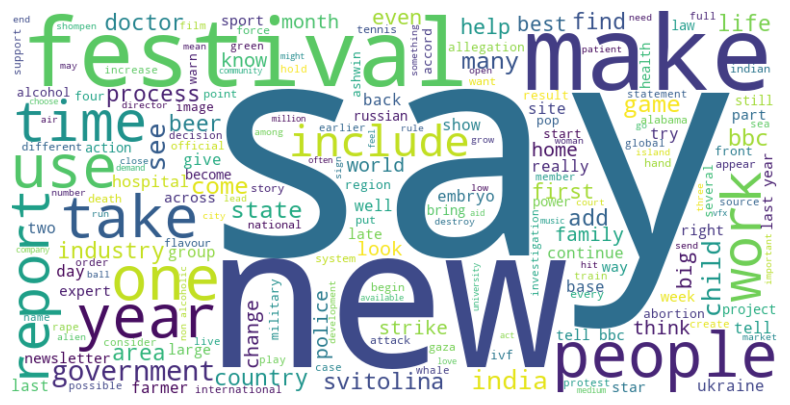

In [72]:
description_text = ' '.join(df['processed_paragraph'].astype(str))
generate_wordcloud(description_text)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=2500)

bag_of_words=tfidf.fit_transform(df["processed_paragraph"])

feature_names=tfidf.get_feature_names_out()

pd.DataFrame(bag_of_words.toarray(),columns=feature_names).head()

,000,100,1000bc,100m,11am,11th,123,128,130,159,...,yoon,young,yourope,youth,zealand,zendaya,zhou,zone,zoroastrian,zurcher
0,0.012889,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.025641,0.0,...,0.0,0.000000,0.025641,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.015598,0.023138,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.021568,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.011742,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.028368,0.0,0.038044,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.039760,0.000000,0.0,0.0,0.057203,0.0,0.0,0.0,0.0


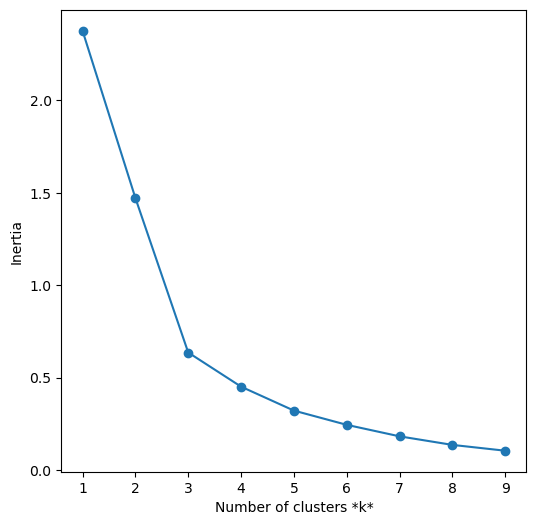

In [29]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans,AgglomerativeClustering
inertias = []  # storer inertia for all values of k
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(bag_of_words_reduced)  # Pass sparse matrix directly
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

[[-1.43590602  1.38282899]
 [ 1.10756284  0.49163533]
 [-0.32495704 -0.76584877]]
[2 2 2 2 2 1 2 0 2 2 0 1 1 2 2 1 2 1 1 0 1 1 2 1 0 2]
13.890646563784097


Text(0.5, 1.0, 'Visualization of clustered data')

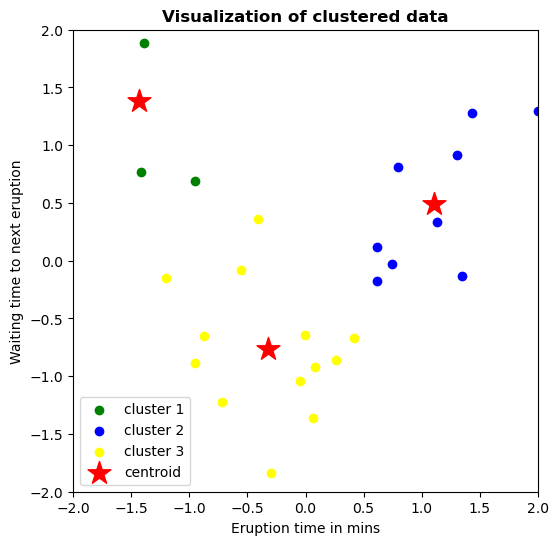

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(bag_of_words_reduced) # standardise data


from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42) 
km.fit(X_std) # fit the data - identify pattern, does everything

centroids = km.cluster_centers_ # final centroid points
print(centroids)
print(km.labels_) # measures how tight my groups are.
print(km.inertia_)

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='yellow', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')


In [57]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_std)
scaler = StandardScaler()
X_std = scaler.fit_transform(bag_of_words_reduced)

Text(0.5, 1.0, 'Hierarchical Clustering')

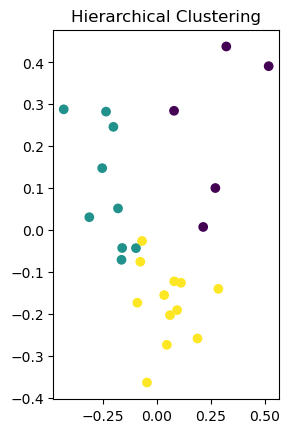

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
bag_of_words_reduced = pca.fit_transform(bag_of_words.toarray())
plt.subplot(1, 2, 2)
plt.scatter(bag_of_words_reduced[:, 0], bag_of_words_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

In [50]:
num_clusters = 3  # Choose the number of clusters based on the topics you want to identify
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_std)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_


In [61]:
num_samples_per_cluster = 5

# Get the number of unique cluster labels
num_clusters = df['Cluster'].nunique()

# Iterate over each cluster
for cluster_label in range(num_clusters):
    # Select articles belonging to the current cluster
    cluster_articles = df[df['Cluster'] == cluster_label]
    
    # Sample articles from the cluster
    sampled_articles = cluster_articles.sample(min(num_samples_per_cluster, len(cluster_articles)))
    
    # Display the cluster label and sampled articles
    print(f"Cluster {cluster_label} - Topic Label: ")
    for index, row in sampled_articles.iterrows():
        print(f"Article Title: {row['Title']}")
        print()


Cluster 0 - Topic Label: 
Article Title: Great Nicobar: Indian president visits island as fears grow for tribe

Article Title: Major Alabama hospital pauses IVF after court rules frozen embryos are children

Article Title: Afghanistan: Archaeological sites 'bulldozed for looting'

Article Title: Capturing the Dark Skies of Wales

Article Title: Indian airlines ordered to stop baggage delay chaos

Cluster 1 - Topic Label: 
Article Title: Underwater Photographer of the Year 2024 winners

Cluster 2 - Topic Label: 
Article Title: The brewing secrets behind tastier no-alcohol beer



In [62]:
lables={0:"Politics/Entertainment/War",1:"Photography",2:"food"}
df["label"]=df["Cluster"].map(lables)

In [64]:
df

,Unnamed: 0,URL,Title,Paragraph,processed_paragraph,Cluster,label
0,0,https://www.bbc.com/news/business-67873127,The festivals searching for greener ways to rock,Hannah Love is a lifelong festival goer. She c...,hannah love lifelong festival goer count first...,0,Politics/Entertainment/War
1,1,https://www.bbc.com/news/business-68017347,The staff shortage in India's special effects ...,"As a child, Vinay Sastha R found his imaginati...",child vinay sastha find imagination fire film ...,0,Politics/Entertainment/War
2,2,https://www.bbc.com/news/business-68138944,The brewing secrets behind tastier no-alcohol ...,Joe Thomson stands surveying his shiny brewery...,joe thomson stand survey shiny brewery elevate...,2,food
3,3,https://www.bbc.com/news/business-68346015,How AI is helping the search for extraterrestr...,There are between 10 and 50 billion potentiall...,billion potentially habitable world galaxy say...,0,Politics/Entertainment/War
4,4,https://www.bbc.com/news/entertainment-arts-68...,London Fashion Week in pictures: Naomi Campbel...,Original supermodel Naomi Campbell capped off ...,original supermodel naomi campbell cap whirlwi...,0,Politics/Entertainment/War
5,5,https://www.bbc.com/news/entertainment-arts-68...,Dan Wootton: Metropolitan Police taking no fur...,Police in London have said they will take no f...,police london say take action news presenter d...,0,Politics/Entertainment/War
6,6,https://www.bbc.com/news/entertainment-arts-68...,Stray Kids: How K-Pop took over the global cha...,"Inevitably enough, Taylor Swift was the bigges...",inevitably enough taylor swift big sell artist...,0,Politics/Entertainment/War
7,7,https://www.bbc.com/news/in-pictures-68336119,Underwater Photographer of the Year 2024 winners,Alex Dawson has been named Underwater Photogra...,alex dawson name underwater photographer year ...,1,Photography
8,8,https://www.bbc.com/news/technology-68312395,Xbox games coming to Nintendo Switch and PS5 n...,Four games that were formerly exclusive to Mic...,four game formerly exclusive microsoft soon av...,0,Politics/Entertainment/War
9,9,https://www.bbc.com/news/world-68261148,In pictures: Welcoming the Lunar New Year,Saturday 10 February marked the start of Lunar...,saturday february mark start lunar new year bi...,0,Politics/Entertainment/War


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_paragraph'], df['Cluster'], test_size=0.2, random_state=42)

# Define the SVM model
svm_model = SVC(kernel="rbf", random_state=42)

# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create a pipeline with TF-IDF vectorizer and SVM model
pipeline = Pipeline([('tfidf', tfidf_vectorizer),
                     ('svm', svm_model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the topics for the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [73]:
import pickle
with open("svm_model_news.pkl","wb") as file:
    pickle.dump(svm_model,file)

In [74]:
with open("vectorizer_model.pkl","wb") as file:
    pickle.dump(tfidf_vectorizer,file)